## **A. Demography**

*1. Year Level*

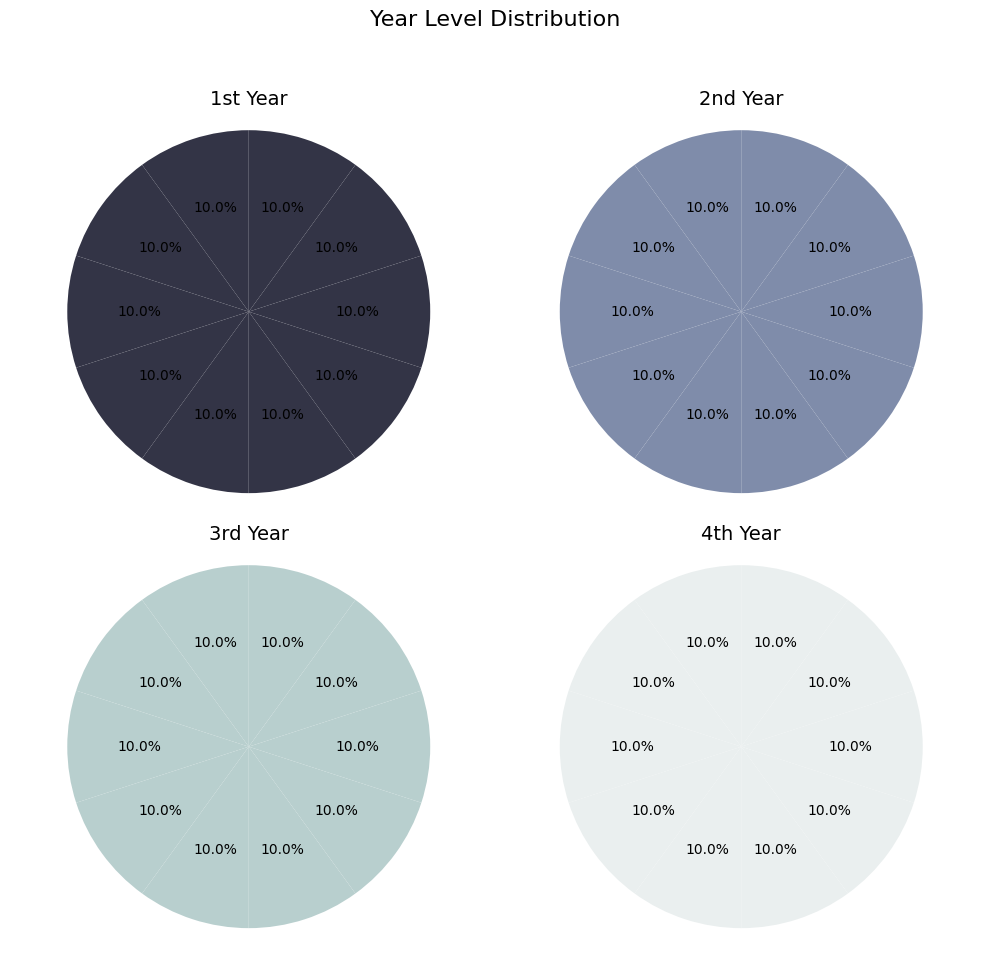

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Year Level Data
year_levels = [
    "1st Year"] * 10 + ["2nd Year"] * 10 + ["3rd Year"] * 10 + ["4th year"] * 10

# Count frequency of each year level
counter = Counter(year_levels)

# Color palette (converted from RGB to HEX)
colors = ['#333446', '#7F8CAA', '#B8CFCE', '#EAEFEF']

# Plot pie charts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Year Level Distribution", fontsize=16)

year_order = ["1st Year", "2nd Year", "3rd Year", "4th Year"]
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for year, pos, color in zip(year_order, positions, colors):
    sizes = [1] * 10  # 10 equal parts
    axs[pos].pie(
        sizes,
        labels=[""] * 10,  # No labels per slice
        colors=[color]*10,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'black'}
    )
    axs[pos].axis('equal')  # Equal aspect ratio
    axs[pos].set_title(year, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


*2. Sex*

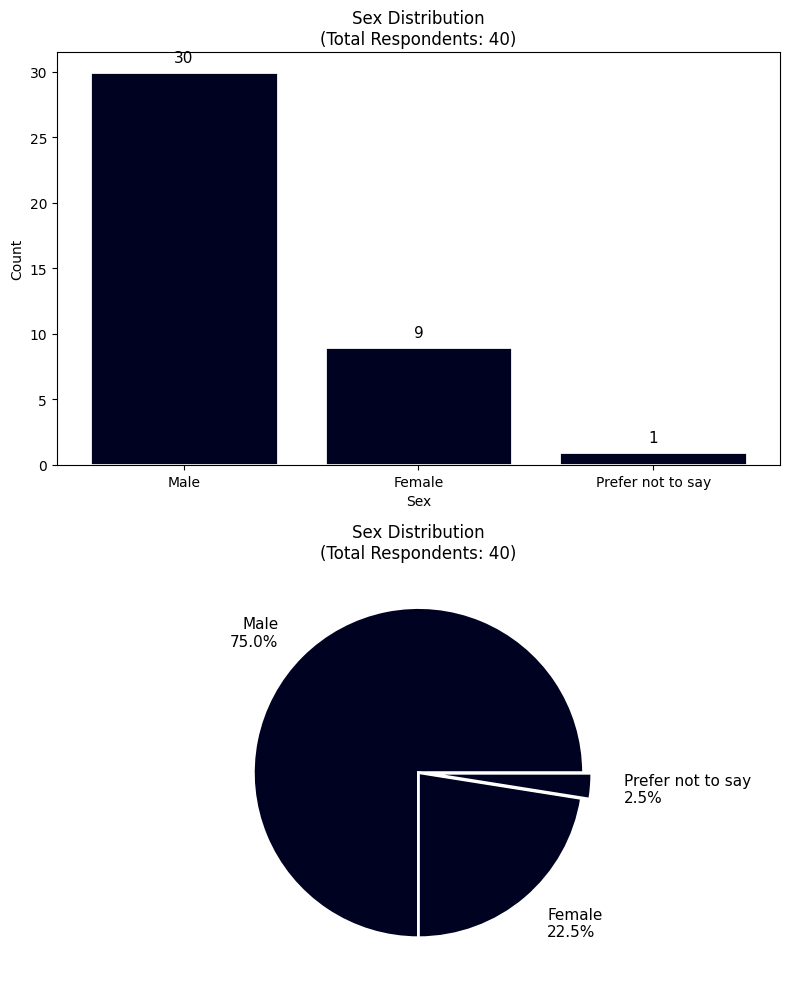

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Updated input data
sex_data = [
    "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male",
    "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male",
    "Female", "Male", "Female", "Female", "Male", "Male", "Prefer not to say", "Male", "Male", "Male",
    "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male"
]

# Count responses
sex_counts = Counter(sex_data)
categories = list(sex_counts.keys())
counts = list(sex_counts.values())
total_respondents = sum(counts)

# Colors and explode
main_color = (0/255, 2/255, 33/255)
colors = [main_color] * len(categories)
explode = [0.05 if count == min(counts) else 0 for count in counts]

# Percentage labels
labels = [f"{cat}\n{(count/total_respondents)*100:.1f}%" for cat, count in zip(categories, counts)]

# Plot stacked vertically
fig, axs = plt.subplots(2, 1, figsize=(8, 10), facecolor='white')

# Bar Chart
bars = axs[0].bar(categories, counts, color=main_color, edgecolor='white', linewidth=2)
axs[0].set_title(f'Sex Distribution\n(Total Respondents: {total_respondents})', color='black')
axs[0].set_xlabel('Sex', color='black')
axs[0].set_ylabel('Count', color='black')
axs[0].tick_params(colors='black')
axs[0].set_facecolor('white')

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
                ha='center', va='bottom', color='black', fontsize=11)

# Pie Chart
axs[1].pie(
    counts,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct=None,
    pctdistance=0.85,
    labeldistance=1.2,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'color': 'black', 'fontsize': 11}
)
axs[1].set_title(f'Sex Distribution\n(Total Respondents: {total_respondents})', color='black')
axs[1].set_facecolor('white')

plt.tight_layout()
plt.show()


*3. Platforms usually use to make purchases in Mobile Legends*

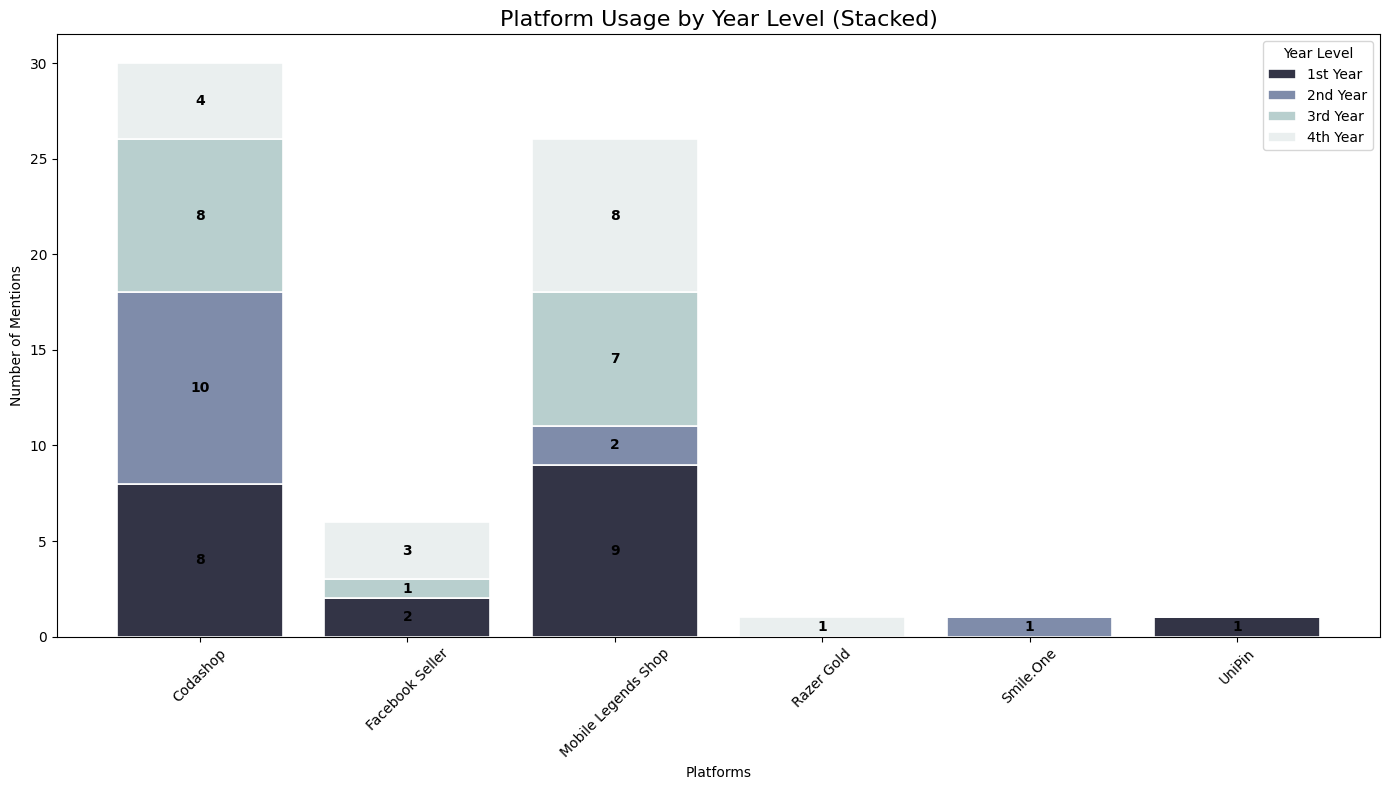

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Raw data combined: (Year, Platform)
year_platform_data = [
    ("2nd Year", "Codashop"),
    ("2nd Year", "Codashop"),
    ("2nd Year", "Codashop"),
    ("2nd Year", "Codashop"),
    ("2nd Year", "Codashop, Smile.One"),
    ("2nd Year", "Mobile Legends Shop, Codashop"),
    ("2nd Year", "Codashop"),
    ("2nd Year", "Codashop"),
    ("2nd Year", "Mobile Legends Shop, Codashop"),
    ("2nd Year", "Codashop"),
    ("1st Year", "Mobile Legends Shop"),
    ("1st Year", "Mobile Legends Shop, Codashop"),
    ("1st Year", "Codashop"),
    ("3rd Year", "Mobile Legends Shop, Codashop"),
    ("3rd Year", "Codashop"),
    ("3rd Year", "Mobile Legends Shop"),
    ("1st Year", "Codashop, UniPin"),
    ("1st Year", "Mobile Legends Shop, Codashop, Facebook Seller"),
    ("1st Year", "Mobile Legends Shop"),
    ("1st Year", "Mobile Legends Shop"),
    ("1st Year", "Mobile Legends Shop, Codashop, Facebook Seller"),
    ("1st Year", "Mobile Legends Shop, Codashop"),
    ("1st Year", "Mobile Legends Shop, Codashop"),
    ("3rd Year", "Mobile Legends Shop, Codashop"),
    ("3rd Year", "Mobile Legends Shop, Codashop"),
    ("3rd Year", "Codashop"),
    ("3rd Year", "Mobile Legends Shop"),
    ("3rd Year", "Codashop"),
    ("3rd Year", "Mobile Legends Shop, Codashop, Facebook Seller"),
    ("3rd Year", "Mobile Legends Shop, Codashop"),
    ("4th Year", "Mobile Legends Shop, Codashop, Razer Gold, Facebook Seller"),
    ("4th Year", "Mobile Legends Shop, Codashop"),
    ("4th Year", "Mobile Legends Shop, Codashop, Facebook Seller"),
    ("4th Year", "Mobile Legends Shop, Codashop, Facebook Seller"),
    ("1st Year", "Codashop"),
    ("1st Year", "Mobile Legends Shop"),
    ("4th Year", "Mobile Legends Shop"),
    ("4th Year", "Mobile Legends Shop"),
    ("4th Year", "Mobile Legends Shop"),
    ("4th Year", "Mobile Legends Shop"),
]

# Define year levels
year_levels = ['1st Year', '2nd Year', '3rd Year', '4th Year']

# Count platforms per year level
platform_year_counts = defaultdict(lambda: defaultdict(int))
for year, platform_str in year_platform_data:
    platforms = [p.strip() for p in platform_str.split(",")]
    for platform in platforms:
        platform_year_counts[platform][year] += 1

# Sorted unique platforms
platforms = sorted(platform_year_counts.keys())

# Data for each year level
year_level_data = {
    year: [platform_year_counts[platform][year] for platform in platforms]
    for year in year_levels
}

# Plot
fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')

bottom = [0] * len(platforms)

# Custom RGB color hex values
colors = ['#333446', '#7f8caa', '#b8cfce', '#eaefef']

for i, year in enumerate(year_levels):
    values = year_level_data[year]
    bars = ax.bar(platforms, values, bottom=bottom, label=year, color=colors[i], edgecolor='white', linewidth=1.2)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                str(int(height)),
                ha='center',
                va='center',
                fontsize=10,
                color='black',
                fontweight='bold'
            )
    bottom = [sum(x) for x in zip(bottom, values)]

# Formatting
ax.set_title('Platform Usage by Year Level (Stacked)', fontsize=16, color='black')
ax.set_ylabel('Number of Mentions', color='black')
ax.set_xlabel('Platforms', color='black')
ax.tick_params(axis='x', rotation=45, labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.legend(title='Year Level', loc='upper right')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*4. Spending range amount on in-game purchases in Mobile Legends*

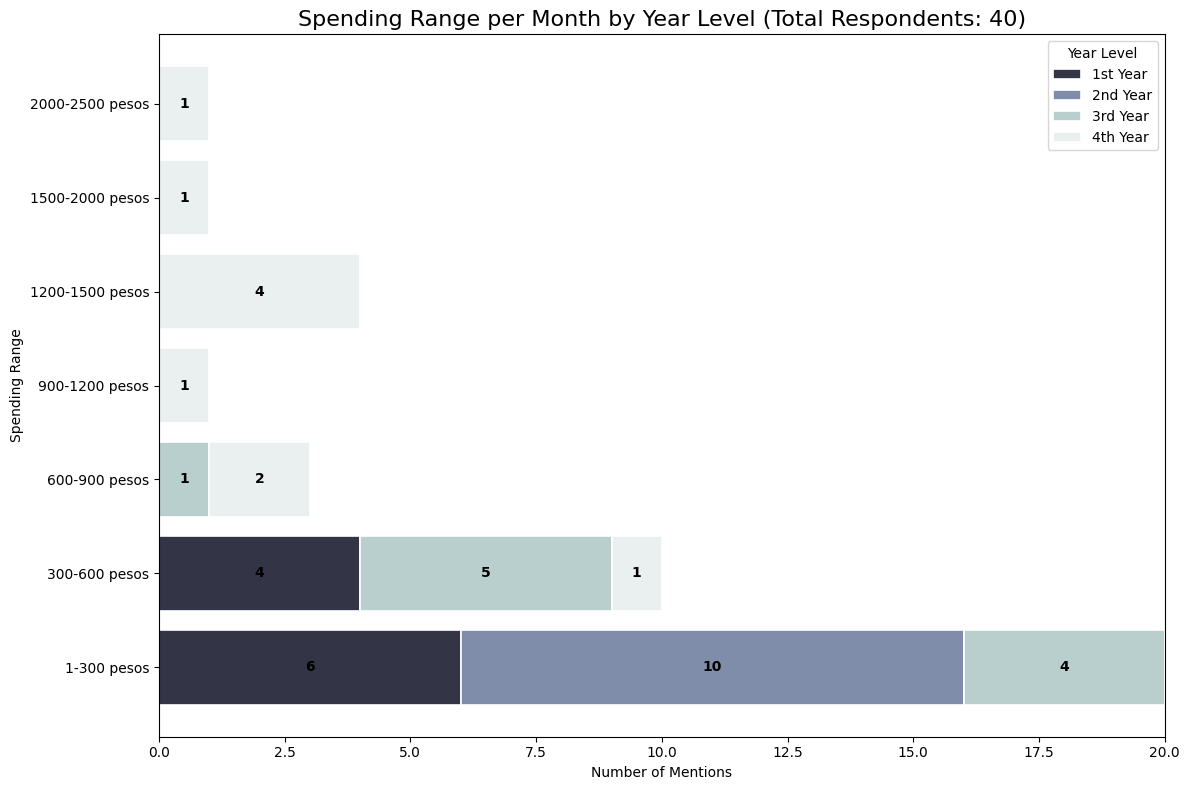

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Updated dataset (40 respondents)
year_spending_data = [
    ("1st Year", "1-300 pesos"), ("1st Year", "300-600 pesos"), ("1st Year", "1-300 pesos"),
    ("1st Year", "1-300 pesos"), ("1st Year", "300-600 pesos"), ("1st Year", "1-300 pesos"),
    ("1st Year", "1-300 pesos"), ("1st Year", "300-600 pesos"), ("1st Year", "300-600 pesos"),
    ("1st Year", "1-300 pesos"),

    ("2nd Year", "1-300 pesos"), ("2nd Year", "1-300 pesos"), ("2nd Year", "1-300 pesos"),
    ("2nd Year", "1-300 pesos"), ("2nd Year", "1-300 pesos"), ("2nd Year", "1-300 pesos"),
    ("2nd Year", "1-300 pesos"), ("2nd Year", "1-300 pesos"), ("2nd Year", "1-300 pesos"),
    ("2nd Year", "1-300 pesos"),

    ("3rd Year", "300-600 pesos"), ("3rd Year", "1-300 pesos"), ("3rd Year", "1-300 pesos"),
    ("3rd Year", "300-600 pesos"), ("3rd Year", "300-600 pesos"), ("3rd Year", "600-900 pesos"),
    ("3rd Year", "1-300 pesos"), ("3rd Year", "1-300 pesos"), ("3rd Year", "300-600 pesos"),
    ("3rd Year", "300-600 pesos"),

    ("4th Year", "1500-2000 pesos"), ("4th Year", "900-1200 pesos"), ("4th Year", "1200-1500 pesos"),
    ("4th Year", "300-600 pesos"), ("4th Year", "1200-1500 pesos"), ("4th Year", "1200-1500 pesos"),
    ("4th Year", "1200-1500 pesos"), ("4th Year", "2000-2500 pesos"), ("4th Year", "600-900 pesos"),
    ("4th Year", "600-900 pesos"),
]

# Define year levels and color palette
year_levels = ['1st Year', '2nd Year', '3rd Year', '4th Year']
colors = ['#333446', '#7f8caa', '#b8cfce', '#eaefef']

# Count spend ranges per year level
spending_year_counts = defaultdict(lambda: defaultdict(int))
for year, spend in year_spending_data:
    spending_year_counts[spend][year] += 1

# Sorted unique spending ranges
def parse_spend_key(key):
    return float(key.split('-')[0].replace(' pesos', '').replace(',', ''))

spend_ranges = sorted(spending_year_counts.keys(), key=parse_spend_key)

# Data for each year level
year_level_data = {
    year: [spending_year_counts[spend][year] for spend in spend_ranges]
    for year in year_levels
}

# Plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
left = [0] * len(spend_ranges)

for i, year in enumerate(year_levels):
    values = year_level_data[year]
    bars = ax.barh(spend_ranges, values, left=left, label=year, color=colors[i], edgecolor='white', linewidth=1.2)

    for bar in bars:
        width = bar.get_width()
        if width > 0:
            ax.text(
                bar.get_x() + width / 2,
                bar.get_y() + bar.get_height() / 2,
                str(int(width)),
                ha='center',
                va='center',
                fontsize=10,
                color='black',
                fontweight='bold'
            )
    left = [sum(x) for x in zip(left, values)]

# Formatting
total_respondents = len(year_spending_data)
ax.set_title(f'Spending Range per Month by Year Level (Total Respondents: {total_respondents})', fontsize=16, color='black')
ax.set_xlabel('Number of Mentions', color='black')
ax.set_ylabel('Spending Range', color='black')
ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.legend(title='Year Level', loc='upper right')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*5. Am I aware that in-game purchases in Mobile Legends are bought using real money?*

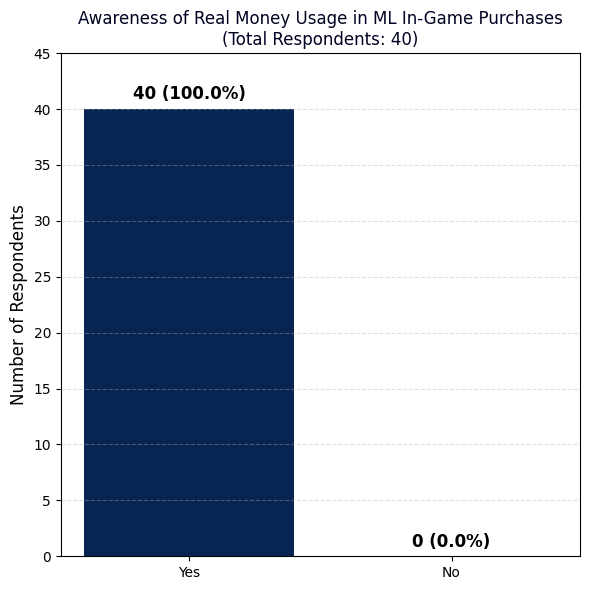

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# New input data: 40 "Yes" responses only
awareness_data = [
    "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
    "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
    "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
    "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"
]

# Count the responses
counter = Counter(awareness_data)
total = len(awareness_data)

# Ensure both "Yes" and "No" are always shown
labels = ["Yes", "No"]
values = [counter.get("Yes", 0), counter.get("No", 0)]
percentages = [(count / total) * 100 if total > 0 else 0 for count in values]

# Create bar chart
plt.figure(figsize=(6, 6), facecolor='white')
bars = plt.bar(labels, values, color=["#072452", "#616a78"])

# Add value + percentage labels on top of bars
for bar, count, pct in zip(bars, values, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{count} ({pct:.1f}%)',
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Labels and title (with total respondents)
plt.title(f"Awareness of Real Money Usage in ML In-Game Purchases\n(Total Respondents: {total})",
          fontsize=12, color="#000221")

plt.ylabel("Number of Respondents", fontsize=12)
plt.ylim(0, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# **B. Questionnaire**

*1. Do I feel pressured to make in-game purchases in order to keep up with other players in Mobile Legends?*

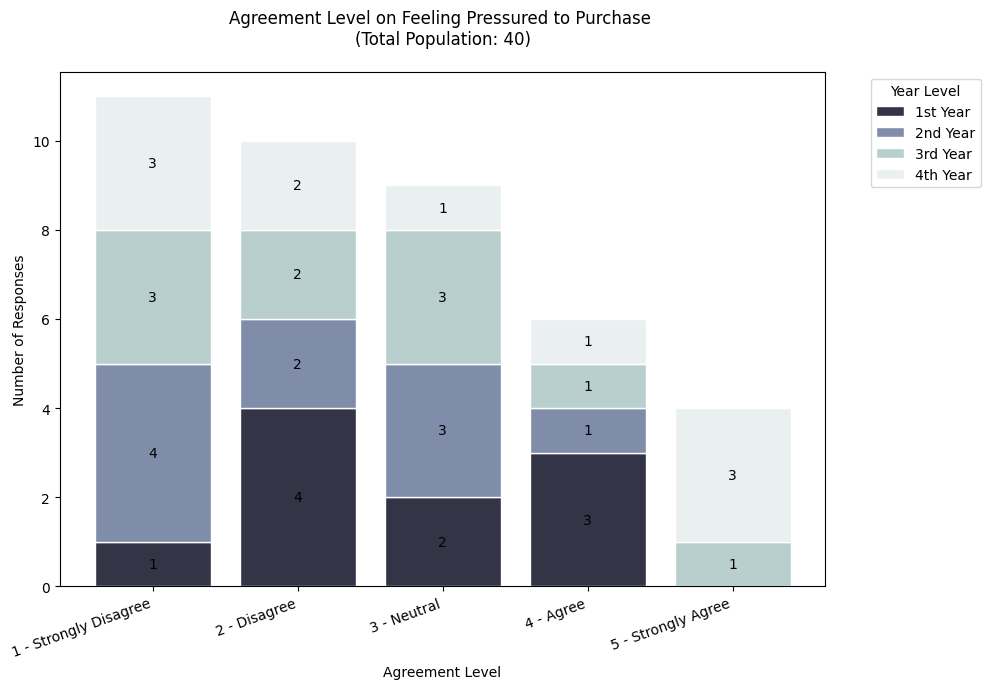

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Corrected Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [2, 2, 1, 3, 2, 2, 4, 4, 3, 4],
    '2nd Year': [1, 1, 1, 3, 2, 4, 2, 3, 1, 3],
    '3rd Year': [3, 1, 2, 5, 4, 3, 3, 2, 1, 1],
    '4th Year': [3, 2, 1, 1, 2, 5, 5, 5, 1, 4]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for i, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Agreement Level on Feeling Pressured to Purchase \n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*2. Is the monetization system in Mobile Legends transparent and easy for me to understand?*

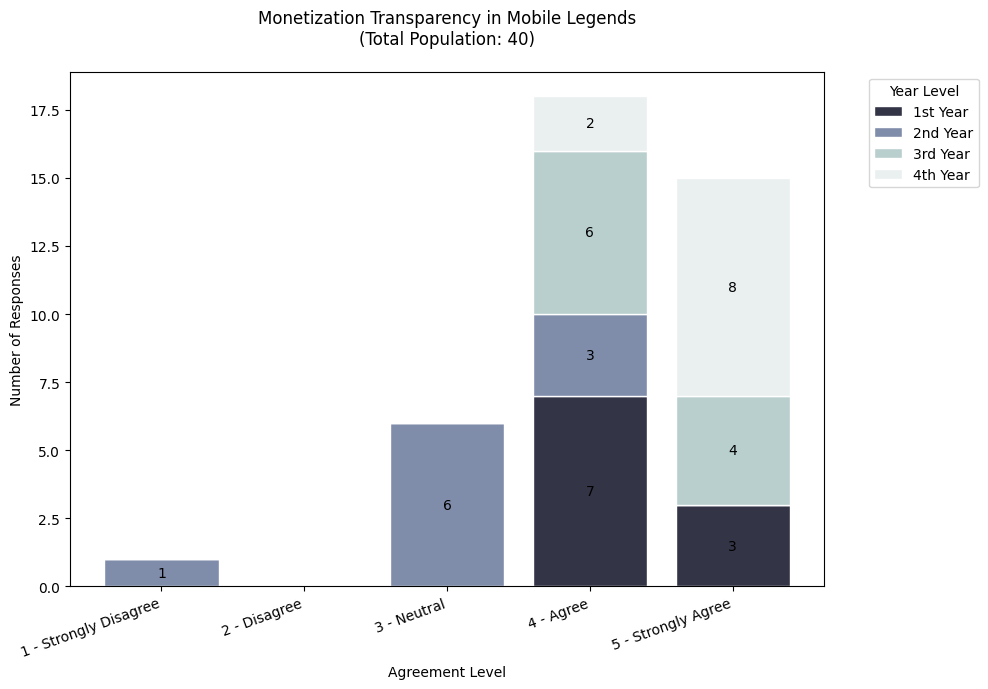

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [4, 4, 4, 4, 5, 4, 5, 4, 4, 5],
    '2nd Year': [4, 3, 1, 3, 4, 4, 3, 3, 3, 3],
    '3rd Year': [4, 4, 5, 5, 4, 4, 4, 4, 5, 5],
    '4th Year': [5, 5, 5, 5, 5, 4, 5, 5, 4, 5]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for i, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Monetization Transparency in Mobile Legends\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*3. Do I think the skins and other cosmetics in Mobile Legends are worth their price?*

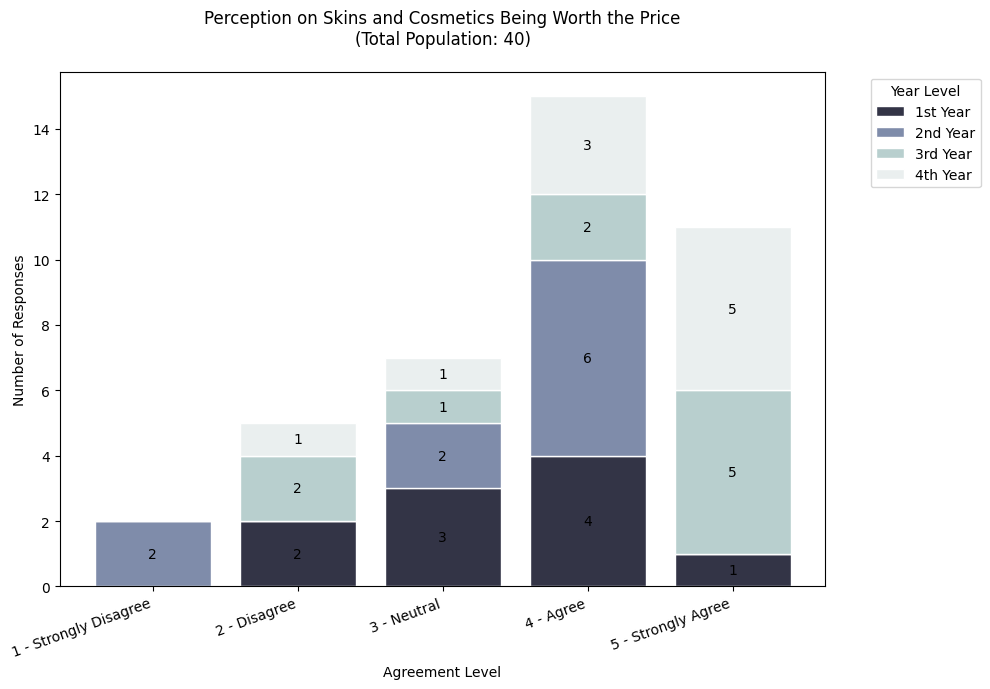

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [3, 4, 4, 4, 5, 4, 3, 3, 2, 2],
    '2nd Year': [4, 4, 1, 3, 4, 4, 4, 3, 1, 4],
    '3rd Year': [5, 5, 4, 3, 4, 5, 5, 5, 2, 2],
    '4th Year': [5, 5, 4, 2, 3, 4, 5, 5, 5, 4]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for i, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Perception on Skins and Cosmetics Being Worth the Price\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*4. Does making in-game purchases in Mobile Legends enhance my overall gaming experience?*

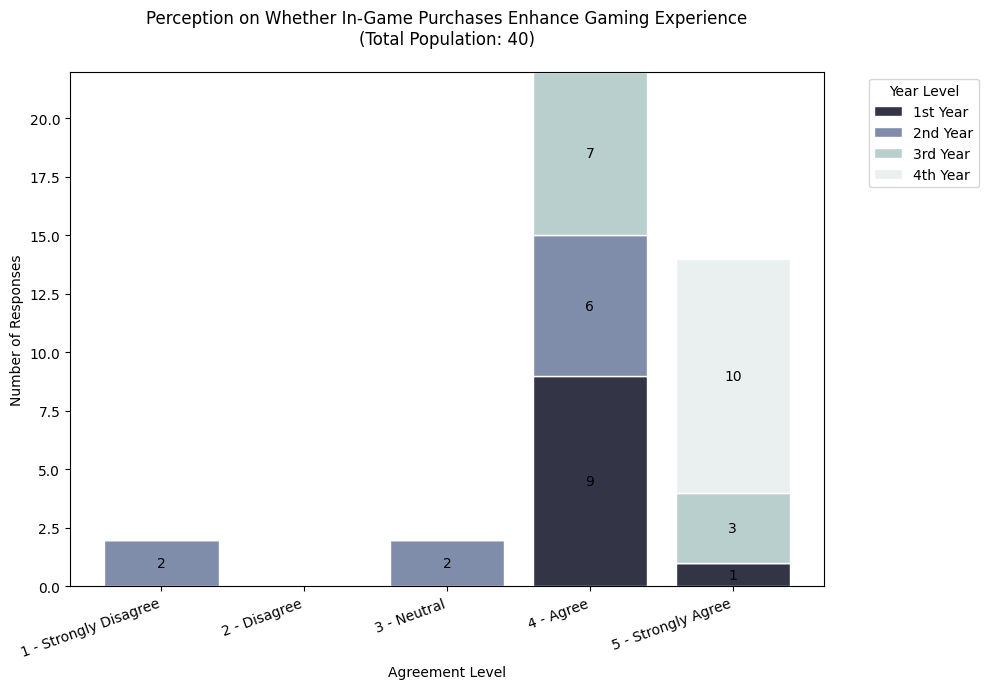

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [4, 4, 5, 4, 4, 4, 4, 4, 4, 4],
    '2nd Year': [4, 4, 1, 3, 4, 4, 4, 1, 3, 4],
    '3rd Year': [4, 5, 4, 4, 4, 5, 4, 4, 4, 5],
    '4th Year': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for i, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Perception on Whether In-Game Purchases Enhance Gaming Experience\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*5. Do I feel that in-game purchases in Mobile Legends give paying players an unfair advantage?*

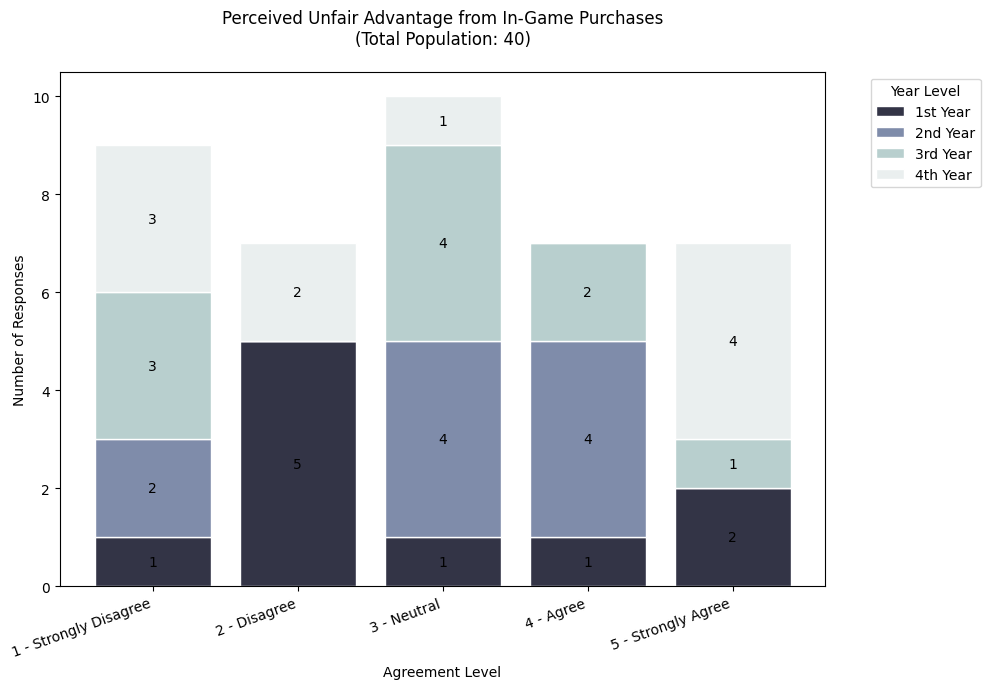

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [2, 1, 2, 2, 2, 2, 4, 3, 5, 5],
    '2nd Year': [3, 1, 1, 3, 4, 4, 4, 4, 3, 3],
    '3rd Year': [3, 1, 3, 4, 4, 3, 5, 3, 1, 1],
    '4th Year': [1, 1, 3, 1, 2, 5, 2, 5, 5, 5]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for i, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Perceived Unfair Advantage from In-Game Purchases\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*6. Do limited-time offers in Mobile Legends influence me to make in-game purchases?*


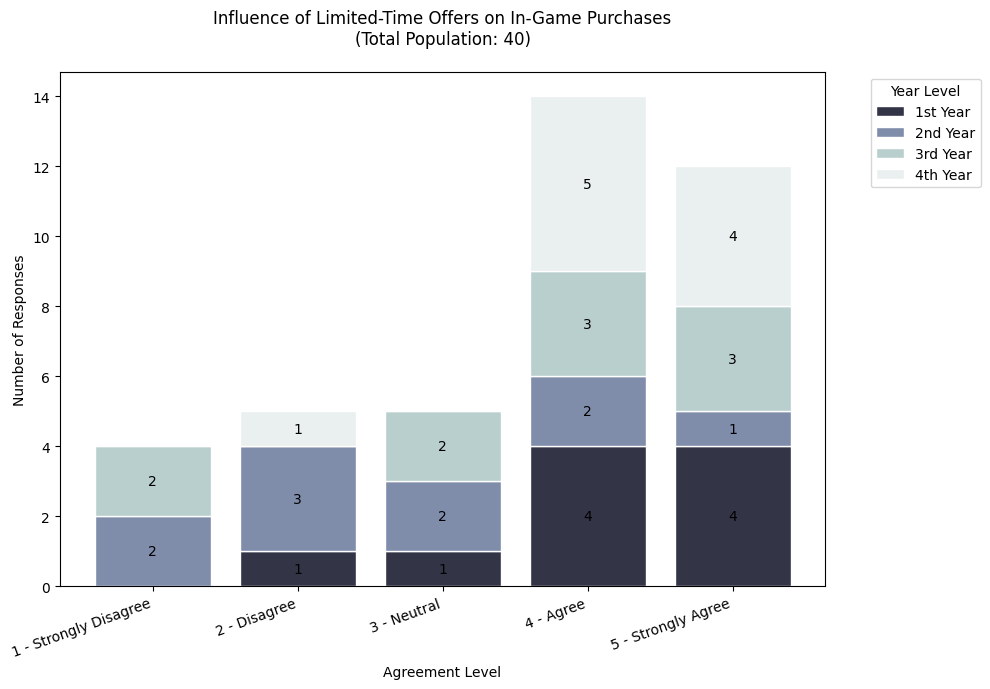

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [4, 5, 5, 4, 5, 4, 2, 4, 5, 3],
    '2nd Year': [2, 4, 1, 3, 3, 4, 2, 2, 1, 5],
    '3rd Year': [5, 5, 4, 3, 5, 4, 3, 4, 1, 1],
    '4th Year': [5, 4, 4, 2, 4, 5, 4, 5, 4, 5]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for i, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Influence of Limited-Time Offers on In-Game Purchases\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*7. Do I feel that my personal and payment information is secure when I buy diamonds or other items in Mobile Legends?*

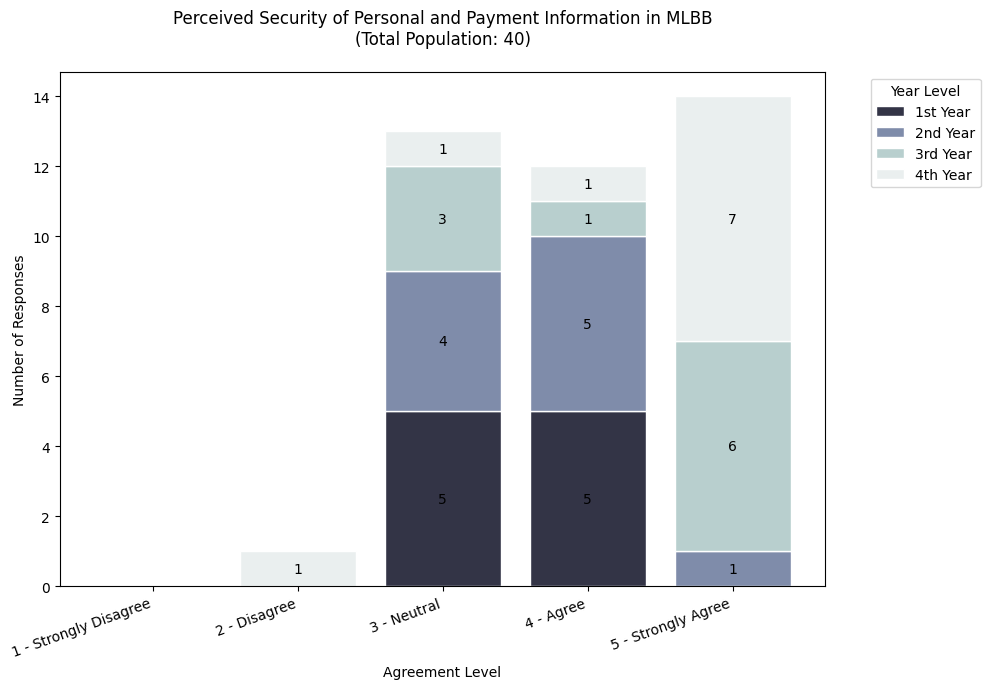

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [4, 4, 3, 4, 4, 4, 3, 3, 3, 3],
    '2nd Year': [4, 4, 5, 3, 4, 4, 3, 4, 3, 3],
    '3rd Year': [5, 5, 5, 3, 3, 5, 4, 3, 5, 5],
    '4th Year': [5, 5, 5, 5, 2, 3, 5, 5, 4, 5]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for bar in bars:
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Perceived Security of Personal and Payment Information in MLBB\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*8. Do in-game purchases in Mobile Legends allow me to customize my heroes and gameplay effectively?*

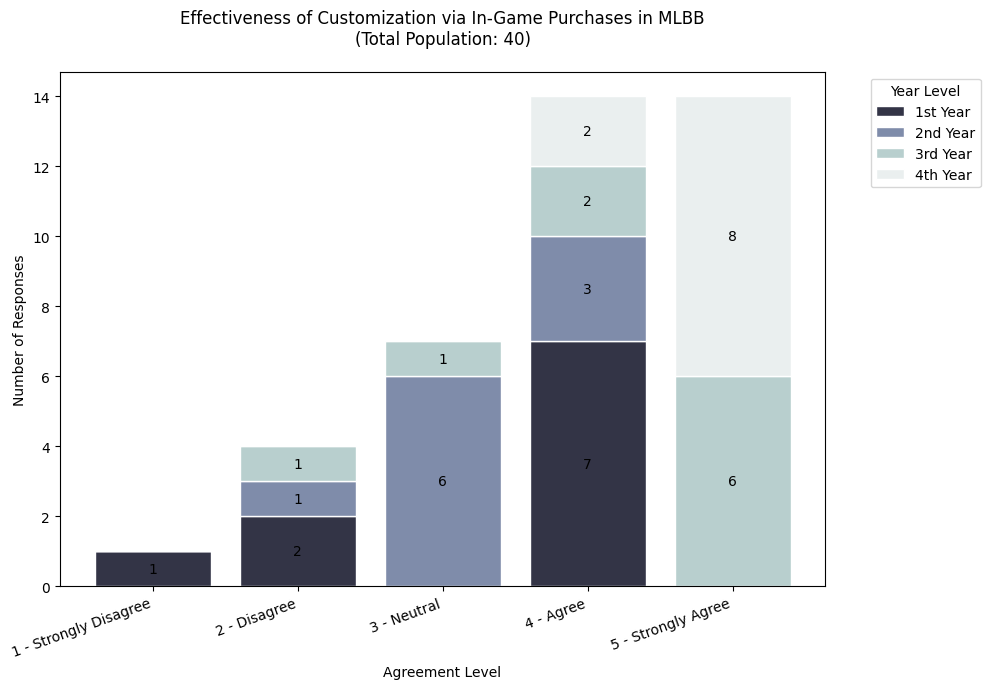

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [4, 4, 4, 4, 4, 4, 2, 1, 4, 2],
    '2nd Year': [3, 3, 2, 3, 4, 4, 3, 3, 4, 3],
    '3rd Year': [5, 5, 5, 3, 2, 4, 5, 4, 5, 5],
    '4th Year': [5, 5, 5, 5, 5, 5, 4, 5, 4, 5]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for bar in bars:
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Effectiveness of Customization via In-Game Purchases in MLBB\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


*9. Have I ever experienced or worried about any security issues while making in-game purchases in Mobile Legends?*

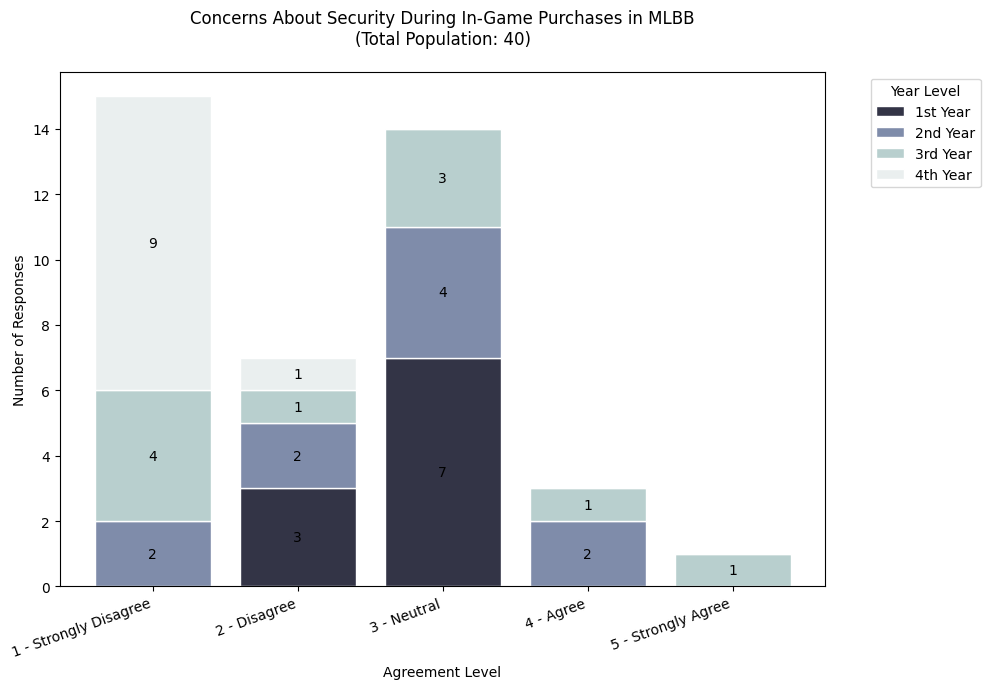

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Updated Likert responses grouped by year level (Total = 40)
data = {
    '1st Year': [3, 2, 3, 2, 3, 2, 3, 3, 3, 3],
    '2nd Year': [1, 2, 1, 3, 2, 4, 3, 3, 3, 4],
    '3rd Year': [2, 1, 1, 3, 3, 4, 5, 3, 1, 1],
    '4th Year': [1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
}

# Likert scale
likert_scale = [1, 2, 3, 4, 5]
likert_labels = [
    '1 - Strongly Disagree',
    '2 - Disagree',
    '3 - Neutral',
    '4 - Agree',
    '5 - Strongly Agree'
]

# Color palette
year_colors = {
    '1st Year': (51/255, 52/255, 70/255),
    '2nd Year': (127/255, 140/255, 170/255),
    '3rd Year': (184/255, 207/255, 206/255),
    '4th Year': (234/255, 239/255, 239/255)
}

# Count responses per Likert category
likert_distribution = defaultdict(lambda: defaultdict(int))
for year, responses in data.items():
    for response in responses:
        likert_distribution[response][year] += 1

# Plotting
x = np.arange(len(likert_scale))
bar_width = 0.6
bottoms = np.zeros(len(likert_scale))

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

for year in year_colors.keys():
    values = [likert_distribution[rating][year] for rating in likert_scale]
    bars = ax.bar(x, values, bottom=bottoms, color=year_colors[year], edgecolor='white', label=year)

    # Add labels inside the stacked bars
    for bar in bars:
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

    bottoms += values

# Customize
ax.set_xticks(x)
ax.set_xticklabels(likert_labels, rotation=20, ha='right')
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Agreement Level')
ax.set_title('Concerns About Security During In-Game Purchases in MLBB\n(Total Population: 40)', pad=20)
ax.legend(title='Year Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()
